In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('taker_buy_quote_volume') / pl.col('quote_volume')).alias('taker_buy_ratio'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

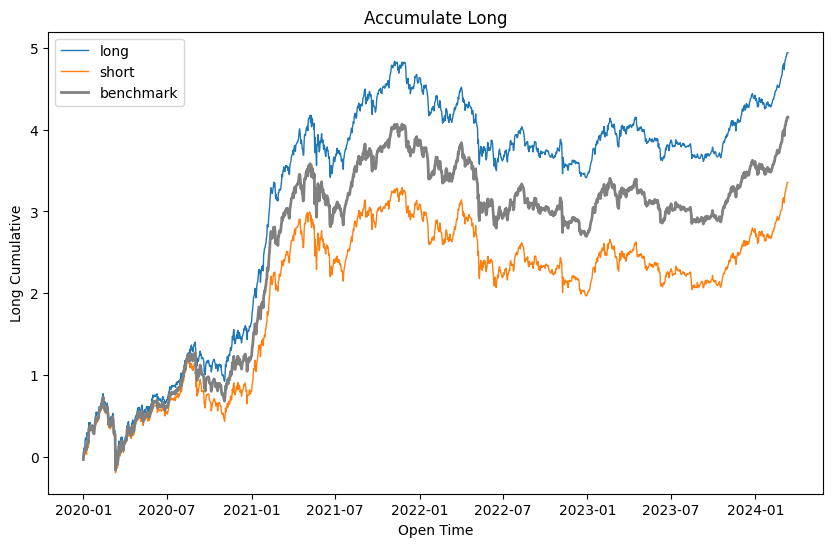

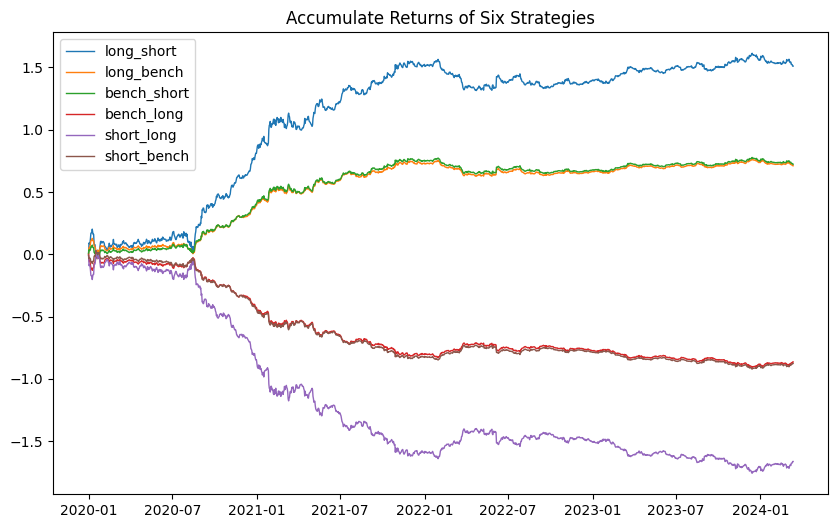

long: 
ann_return = 28.2444  sharpe = 6.2381  maxdd = 0.4989  calmar_ratio = 56.6084  

short: 
ann_return = 19.1761  sharpe = 4.1032  maxdd = 0.5297  calmar_ratio = 36.1998  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 8.6303  sharpe = 7.1765  maxdd = 0.1917  calmar_ratio = 45.0218  

long_bench: 
ann_return = 4.0615  sharpe = 6.611  maxdd = 0.1109  calmar_ratio = 36.6088  

bench_long: 
ann_return = -4.9375  sharpe = -8.0368  maxdd = 0.9085  calmar_ratio = -5.4346  

short_long: 
ann_return = -9.5063  sharpe = -7.9049  maxdd = 1.7384  calmar_ratio = -5.4684  

short_bench: 
ann_return = -5.0067  sharpe = -8.4209  maxdd = 0.924  calmar_ratio = -5.4187  

bench_short: 
ann_return = 4.1307  sharpe = 6.9476  maxdd = 0.0984  calmar_ratio = 41.967  



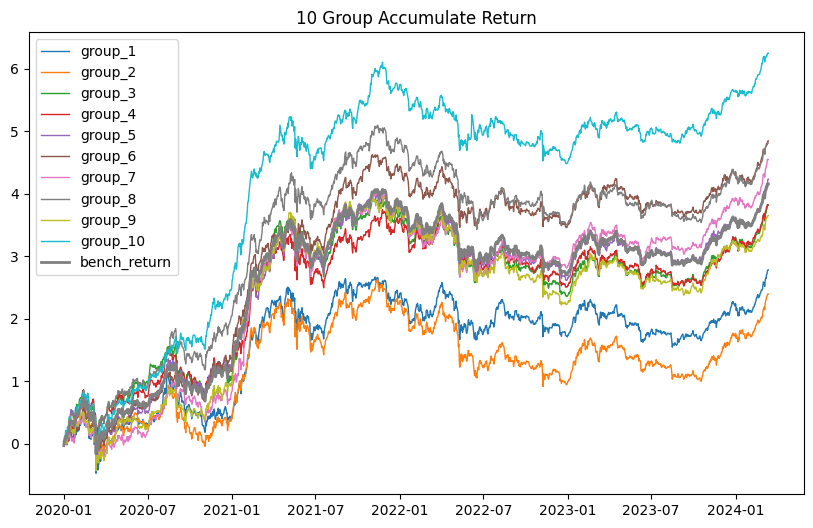

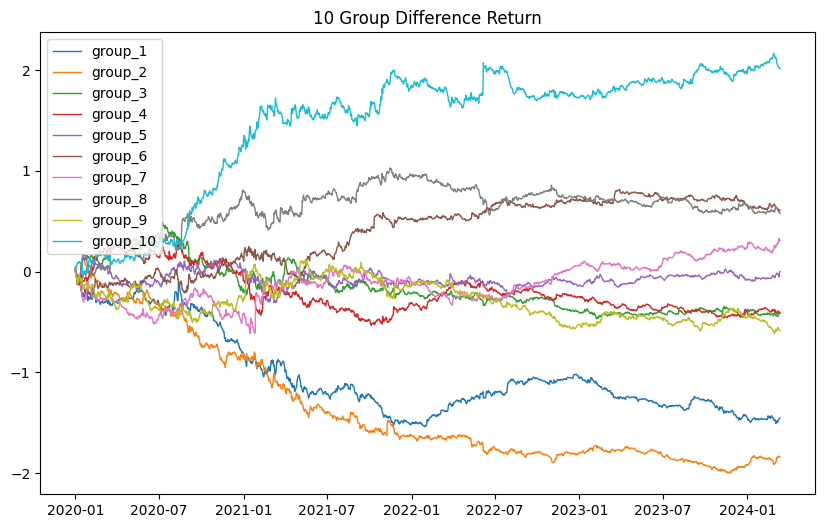

group_1: 
ann_return = 15.8741  sharpe = 3.3063  maxdd = 0.6445  calmar_ratio = 24.6304  

group_2: 
ann_return = 13.6665  sharpe = 2.7677  maxdd = 0.6085  calmar_ratio = 22.4584  

group_3: 
ann_return = 21.825  sharpe = 4.497  maxdd = 0.443  calmar_ratio = 49.2694  

group_4: 
ann_return = 21.8279  sharpe = 4.5213  maxdd = 0.4459  calmar_ratio = 48.9548  

group_5: 
ann_return = 24.1804  sharpe = 5.1109  maxdd = 0.5198  calmar_ratio = 46.518  

group_6: 
ann_return = 27.6781  sharpe = 5.7978  maxdd = 0.5911  calmar_ratio = 46.8242  

group_7: 
ann_return = 25.9632  sharpe = 5.2776  maxdd = 0.5915  calmar_ratio = 43.8924  

group_8: 
ann_return = 27.4865  sharpe = 5.6529  maxdd = 0.4838  calmar_ratio = 56.8189  

group_9: 
ann_return = 20.8444  sharpe = 4.4415  maxdd = 0.6239  calmar_ratio = 33.4124  

group_10: 
ann_return = 35.6926  sharpe = 7.6968  maxdd = 0.4466  calmar_ratio = 79.9236  

-----------------------------------------
group_difference_1: 
ann_return = -8.3087  sharpe =

In [2]:
factors = df.select(['open_time', 'symbol', 'taker_buy_ratio'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()